In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)


# Motivation

My project looks at shot data and betting data for the NHL in the 2017-2018 season. I chose this project because I am an avid hockey fan and thought it would be interesting to explore how different shot metrics would correlate with betting data to find if there were any paticular shooting metrics that were found more often in teams that were favored or underdogs.

# Datasets

For this project, the first dataset I use is titled "shots_2017.csv" that I downloaded off of https://moneypuck.com, a highly respected NHL analytics website. This dataset contains over 120 datapoints on every shot taken during the 2017-2018 NHL season, which comes out to 119,715 shots in total. The other dataset I use for this project is an xlsx file titled "nhl odds 2017-18.xlsx" which contains all of the betting lines and corresponding odds for every game of the same season. I downloaded this dataset off of https://sportsbookreviewsonline.com. 

From the moneypuck dataset, the main datapoints I use when analyzing a shot are "event", "xGoal", "shotType", "defendingTeamMaxTimeOnIce", as well as "game_id" and "teamCode" for grouping purposes. Event states whether the shot missed the net, was saved, or was a goal. xGoal is short for expected goal value, which is an advanced metric used in the hockey analytics world that takes many different variables into account, including the (x,y) coordinate of the shot, the shot angle, whether the shot was off a rebound, etc. in order to determine the expected amount of goals generated from the shot. This shows when teams generate a lot of quality chances, even if the opposing goalie has a good night and shuts down the shooting team. Shot type states if the shot was a wrist shot, slap shot, deflection, etc. The last datapoint I used for my analysis is defendingTeamMaxTimeOnIce, which gives the number of seconds that the player on the defending team who has been on the ice the longest has been on the ice at the time of the shot. This dictates whether a shot is taken during a long shift for the opponents when they may be tired and give up better chances.

From the betting dataset, I use the Opening and Closing odds to determine favorites, as well as the opening and closing over under lines and the final scores of each game.

In [556]:
shots = pd.read_csv("shots_2017.csv")
shots

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
0,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,0.196962,0.036540,0.429376,0.310837,0.019445,0.666207,1,1,WPG,37.0
1,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,0.102211,0.086022,0.434624,0.246754,0.016345,0.790477,1,1,WPG,72.0
2,1054131,WPG,TOR,2017,0,20001,0,13,63,6,...,0.207438,0.055882,0.373207,0.262948,0.022178,0.699232,1,1,WPG,70.0
3,1054132,WPG,TOR,2017,0,20001,0,17,75,31,...,0.219320,0.034028,0.438055,0.271332,0.022032,0.615064,1,0,WPG,34.0
4,1054133,WPG,TOR,2017,0,20001,0,18,106,8,...,0.147830,0.097626,0.321279,0.220833,0.022817,0.944446,0,1,TOR,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119710,1173839,VGK,WSH,2017,1,30415,0,333,3369,0,...,0.289481,0.140956,0.212998,0.122194,0.038453,0.960851,1,1,VGK,83.0
119711,1173840,VGK,WSH,2017,1,30415,0,343,3476,0,...,0.223765,0.031350,0.420576,0.288197,0.024490,0.750509,1,1,VGK,54.0
119712,1173841,VGK,WSH,2017,1,30415,0,352,3533,4,...,0.121599,0.060607,0.589134,0.184549,0.019014,0.602620,1,0,VGK,33.0
119713,1173842,VGK,WSH,2017,1,30415,0,353,3537,24,...,0.006774,0.005195,0.086696,0.122560,0.007963,0.686045,0,0,WSH,20.0


In [557]:
dictionary = pd.read_csv('MoneyPuck_Shot_Data_Dictionary.csv')
dictionary.head()

,Variable,Definition,Unnamed: 2
0,shotID,Unique id for each shot,NaN
1,homeTeamCode,"The home team in the game. For example: TOR, M...",NaN
2,awayTeamCode,The away team in the game,NaN
3,season,Season the shot took place in. Example: 2009 f...,NaN
4,isPlayoffGame,"Set to 1 if a playoff game, otherwise 0",NaN


In [558]:
odds = pd.read_excel('nhl odds 2017-18.xlsx')
odds

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15
0,1004,1,V,Toronto,3,1,3,7,-110,-105,1.5,-295,5.5,-125,6.0,-115
1,1004,2,H,Winnipeg,0,0,2,2,-110,-115,-1.5,235,5.5,105,6.0,-105
2,1004,3,V,St.Louis,2,1,1,5,165,160,1.5,-185,5.5,-110,5.5,105
3,1004,4,H,Pittsburgh,1,1,2,4,-185,-180,-1.5,160,5.5,-110,5.5,-125
4,1004,5,V,Calgary,0,0,0,0,132,135,1.5,-230,5.5,-106,5.5,-105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,602,6,H,Washington,0,2,1,3,-137,-130,-1.5,205,5.5,-115,5.5,-115
2706,604,7,V,Vegas,0,0,2,2,105,102,1.5,-260,5.5,-106,5.5,-101
2707,604,8,H,Washington,3,1,2,6,-125,-122,-1.5,210,5.5,-114,5.5,-119
2708,607,9,V,Washington,0,2,2,4,115,143,1.5,-185,5.5,-105,5.5,-119


# Data Cleaning and Manipulation of Odds Dataset

I start by giving each game a game_id value that will be used to join the two datasets. The game_id value starts at 20001 and goes up by one each game, so I created a function that would use the current index of the game in the odds dataset and add 20001 to the index divided by 2 so that every other row would move up one game_id, since each game is two rows in the dataset back to back. I then added a column that converted the team name to the team code which will become useful during later manipulation. Lastly, I update the column names and convert the odds from American to Decimal so that they will work better during analysis and visualizations.

### Adding Game ID

In [559]:
def game_id(self):
    return 20001 + int(self/2)

odds['game_id'] = odds.index.to_series().apply(game_id)
odds

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,game_id
0,1004,1,V,Toronto,3,1,3,7,-110,-105,1.5,-295,5.5,-125,6.0,-115,20001
1,1004,2,H,Winnipeg,0,0,2,2,-110,-115,-1.5,235,5.5,105,6.0,-105,20001
2,1004,3,V,St.Louis,2,1,1,5,165,160,1.5,-185,5.5,-110,5.5,105,20002
3,1004,4,H,Pittsburgh,1,1,2,4,-185,-180,-1.5,160,5.5,-110,5.5,-125,20002
4,1004,5,V,Calgary,0,0,0,0,132,135,1.5,-230,5.5,-106,5.5,-105,20003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,602,6,H,Washington,0,2,1,3,-137,-130,-1.5,205,5.5,-115,5.5,-115,21353
2706,604,7,V,Vegas,0,0,2,2,105,102,1.5,-260,5.5,-106,5.5,-101,21354
2707,604,8,H,Washington,3,1,2,6,-125,-122,-1.5,210,5.5,-114,5.5,-119,21354
2708,607,9,V,Washington,0,2,2,4,115,143,1.5,-185,5.5,-105,5.5,-119,21355


### Team Name to Code Conversion

In [560]:
team_to_code = {
     'Anaheim': 'ANA',
     'Arizona': 'ARI',
     'Boston': 'BOS',
     'Buffalo': 'BUF',
     'Carolina': 'CAR',
     'Columbus': 'CBJ',
     'Calgary': 'CGY',
     'Chicago': 'CHI',
     'Colorado': 'COL',
     'Dallas': 'DAL',
     'Detroit': 'DET',
     'Edmonton': 'EDM',
     'Florida': 'FLA',
     'LosAngeles': 'L.A',
     'Minnesota': 'MIN',
     'Montreal': 'MTL',
     'NewJersey': 'N.J',
     'Nashville': 'NSH',
     'NYIslanders': 'NYI',
     'NYRangers': 'NYR',
     'Ottawa': 'OTT',
     'Philadelphia': 'PHI',
     'Pittsburgh': 'PIT',
     'SanJose': 'S.J',
     'St.Louis': 'STL',
     'TampaBay': 'T.B',
     'Toronto': 'TOR',
     'Vancouver': 'VAN',
     'Vegas': 'VGK',
     'Winnipeg': 'WPG',
     'Washington': 'WSH'
}


In [561]:
odds['team_code'] = odds['Team'].apply(lambda x: team_to_code[x])
odds

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,game_id,team_code
0,1004,1,V,Toronto,3,1,3,7,-110,-105,1.5,-295,5.5,-125,6.0,-115,20001,TOR
1,1004,2,H,Winnipeg,0,0,2,2,-110,-115,-1.5,235,5.5,105,6.0,-105,20001,WPG
2,1004,3,V,St.Louis,2,1,1,5,165,160,1.5,-185,5.5,-110,5.5,105,20002,STL
3,1004,4,H,Pittsburgh,1,1,2,4,-185,-180,-1.5,160,5.5,-110,5.5,-125,20002,PIT
4,1004,5,V,Calgary,0,0,0,0,132,135,1.5,-230,5.5,-106,5.5,-105,20003,CGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,602,6,H,Washington,0,2,1,3,-137,-130,-1.5,205,5.5,-115,5.5,-115,21353,WSH
2706,604,7,V,Vegas,0,0,2,2,105,102,1.5,-260,5.5,-106,5.5,-101,21354,VGK
2707,604,8,H,Washington,3,1,2,6,-125,-122,-1.5,210,5.5,-114,5.5,-119,21354,WSH
2708,607,9,V,Washington,0,2,2,4,115,143,1.5,-185,5.5,-105,5.5,-119,21355,WSH


### Updating Column Names

In [562]:
odds.columns = ['Date', 'Rot', 'VH', 'Team', '1st', '2nd', '3rd', 'Final', 'Open', 'Close', 'Puck_line', 'Puck_line_odds', 'Open_OU', 'Open_OU_odds', 'Close_OU', 'Close_OU_odds', 'game_id', 'Team_code']

odds

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,game_id,Team_code
0,1004,1,V,Toronto,3,1,3,7,-110,-105,1.5,-295,5.5,-125,6.0,-115,20001,TOR
1,1004,2,H,Winnipeg,0,0,2,2,-110,-115,-1.5,235,5.5,105,6.0,-105,20001,WPG
2,1004,3,V,St.Louis,2,1,1,5,165,160,1.5,-185,5.5,-110,5.5,105,20002,STL
3,1004,4,H,Pittsburgh,1,1,2,4,-185,-180,-1.5,160,5.5,-110,5.5,-125,20002,PIT
4,1004,5,V,Calgary,0,0,0,0,132,135,1.5,-230,5.5,-106,5.5,-105,20003,CGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,602,6,H,Washington,0,2,1,3,-137,-130,-1.5,205,5.5,-115,5.5,-115,21353,WSH
2706,604,7,V,Vegas,0,0,2,2,105,102,1.5,-260,5.5,-106,5.5,-101,21354,VGK
2707,604,8,H,Washington,3,1,2,6,-125,-122,-1.5,210,5.5,-114,5.5,-119,21354,WSH
2708,607,9,V,Washington,0,2,2,4,115,143,1.5,-185,5.5,-105,5.5,-119,21355,WSH


### Converting Odds

In [563]:
def american_to_decimal(self):
    if self > 0:                 # if the bet is plus odds
        return (self / 100) + 1  # appropriate conversion from American to decimal odds
    else:                        # if the bet is minus odds
        return 1 - (100 / self)  # appropriate conversion from American to decimal odds

In [564]:
odds['Open'] = odds['Open'].apply(american_to_decimal)
odds['Close'] = odds['Close'].apply(american_to_decimal)
odds['Puck_line_odds'] = odds['Puck_line_odds'].apply(american_to_decimal)
odds['Open_OU_odds'] = odds['Open_OU_odds'].apply(american_to_decimal)
odds['Close_OU_odds'] = odds['Close_OU_odds'].apply(american_to_decimal)
odds

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,game_id,Team_code
0,1004,1,V,Toronto,3,1,3,7,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,20001,TOR
1,1004,2,H,Winnipeg,0,0,2,2,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,20001,WPG
2,1004,3,V,St.Louis,2,1,1,5,2.650000,2.600000,1.5,1.540541,5.5,1.909091,5.5,2.050000,20002,STL
3,1004,4,H,Pittsburgh,1,1,2,4,1.540541,1.555556,-1.5,2.600000,5.5,1.909091,5.5,1.800000,20002,PIT
4,1004,5,V,Calgary,0,0,0,0,2.320000,2.350000,1.5,1.434783,5.5,1.943396,5.5,1.952381,20003,CGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,602,6,H,Washington,0,2,1,3,1.729927,1.769231,-1.5,3.050000,5.5,1.869565,5.5,1.869565,21353,WSH
2706,604,7,V,Vegas,0,0,2,2,2.050000,2.020000,1.5,1.384615,5.5,1.943396,5.5,1.990099,21354,VGK
2707,604,8,H,Washington,3,1,2,6,1.800000,1.819672,-1.5,3.100000,5.5,1.877193,5.5,1.840336,21354,WSH
2708,607,9,V,Washington,0,2,2,4,2.150000,2.430000,1.5,1.540541,5.5,1.952381,5.5,1.840336,21355,WSH


# Joining the Datasets

I join the two datasets on the game_id value so that the betting odds will be present for any given shot during a specific game. An issue that comes up during the joining of these datasets is that the games are listed in slightly different orders to start with in the two datasets, so they do not always match up. The problem with this is that game_id is an arbitrary identifier, so there is no way to fix this issue without manually matching the over 1,300 games to the correct game_id values. Instead, I created a seperate dataframe with the condition that the team codes match in the two datasets to ensure that the betting data is correct for any given game. Since the sample size is very large to begin with, I still believe there are meaningful insights to be made within the smaller dataset. I will use this second dataset to perform my analysis. 

In [565]:
full_data = shots.merge(odds, on='game_id')
full_data

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,Final,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,Team_code
0,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,7,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR
1,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,2,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG
2,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,7,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR
3,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,2,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG
4,1054131,WPG,TOR,2017,0,20001,0,13,63,6,...,7,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224457,1166357,S.J,MIN,2017,0,21271,0,286,3562,3,...,2,1.416667,1.289855,-1.5,1.704225,5.5,2.000000,6.0,1.854701,BOS
224458,1166358,S.J,MIN,2017,0,21271,0,287,3565,5,...,4,3.000000,3.750000,1.5,2.220000,5.5,1.833333,6.0,1.970874,FLA
224459,1166358,S.J,MIN,2017,0,21271,0,287,3565,5,...,2,1.416667,1.289855,-1.5,1.704225,5.5,2.000000,6.0,1.854701,BOS
224460,1166359,S.J,MIN,2017,0,21271,0,289,3574,26,...,4,3.000000,3.750000,1.5,2.220000,5.5,1.833333,6.0,1.970874,FLA


### Checking if the Teams Match

In [566]:
def func(row):
    return (row.homeTeamCode == row.Team_code) | (row.awayTeamCode == row.Team_code)

full_data["teams_match"] = full_data.apply(func, axis=1) # Add a column with a boolean value for the teams matching
full_data

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,Team_code,teams_match
0,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
1,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
2,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
3,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
4,1054131,WPG,TOR,2017,0,20001,0,13,63,6,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224457,1166357,S.J,MIN,2017,0,21271,0,286,3562,3,...,1.416667,1.289855,-1.5,1.704225,5.5,2.000000,6.0,1.854701,BOS,False
224458,1166358,S.J,MIN,2017,0,21271,0,287,3565,5,...,3.000000,3.750000,1.5,2.220000,5.5,1.833333,6.0,1.970874,FLA,False
224459,1166358,S.J,MIN,2017,0,21271,0,287,3565,5,...,1.416667,1.289855,-1.5,1.704225,5.5,2.000000,6.0,1.854701,BOS,False
224460,1166359,S.J,MIN,2017,0,21271,0,289,3574,26,...,3.000000,3.750000,1.5,2.220000,5.5,1.833333,6.0,1.970874,FLA,False


### Creating New Dataframe

In [567]:
correct_games = full_data[full_data['teams_match'] == True]
correct_games

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,Team_code,teams_match
0,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
1,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
2,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
3,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
4,1054131,WPG,TOR,2017,0,20001,0,13,63,6,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223943,1166100,CGY,VGK,2017,0,21268,1,321,3479,11,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True
223944,1166101,CGY,VGK,2017,0,21268,1,324,3510,5,...,1.781250,1.689655,-1.5,3.000000,6.0,2.100000,5.5,1.909091,VGK,True
223945,1166101,CGY,VGK,2017,0,21268,1,324,3510,5,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True
223946,1166102,CGY,VGK,2017,0,21268,1,328,3543,57,...,1.781250,1.689655,-1.5,3.000000,6.0,2.100000,5.5,1.909091,VGK,True


### Check for Correct Betting Lines

Since each game in the odds data was two different rows containing the betting data of the two teams, each shot is currently double counted because I merged the datasets on the game_id value and two rows of data were present in the odds data for each game. In order to fix this issue, a new dataframe is created under the condition that the team code of the shooting team matches the team code of the betting data. This ensures that the betting data in a row is for the shooting team.

In [568]:
correct_games = correct_games[correct_games['teamCode'] == correct_games['Team_code']]
correct_games

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,Team_code,teams_match
1,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
3,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
5,1054131,WPG,TOR,2017,0,20001,0,13,63,6,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
7,1054132,WPG,TOR,2017,0,20001,0,17,75,31,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
8,1054133,WPG,TOR,2017,0,20001,0,18,106,8,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223938,1166098,CGY,VGK,2017,0,21268,1,319,3425,13,...,1.781250,1.689655,-1.5,3.000000,6.0,2.100000,5.5,1.909091,VGK,True
223941,1166099,CGY,VGK,2017,0,21268,1,320,3438,41,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True
223943,1166100,CGY,VGK,2017,0,21268,1,321,3479,11,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True
223945,1166101,CGY,VGK,2017,0,21268,1,324,3510,5,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True


# Data Analysis and Visualization I

In this section, I explore shot accuracy. I create a new column for each team in a given game with the percentage of their total shots that hit the net.

### Separate Shots

In [569]:
on_goal = correct_games[(correct_games['event'] == 'SHOT') | (correct_games['event'] == 'GOAL')]
miss_net = correct_games[correct_games['event'] == 'MISS']

In [570]:
on_goal

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,Team_code,teams_match
1,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
3,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
5,1054131,WPG,TOR,2017,0,20001,0,13,63,6,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
8,1054133,WPG,TOR,2017,0,20001,0,18,106,8,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
15,1054136,WPG,TOR,2017,0,20001,0,26,222,8,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223932,1166095,CGY,VGK,2017,0,21268,1,311,3306,60,...,1.781250,1.689655,-1.5,3.000000,6.0,2.100000,5.5,1.909091,VGK,True
223935,1166096,CGY,VGK,2017,0,21268,1,312,3366,3,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True
223938,1166098,CGY,VGK,2017,0,21268,1,319,3425,13,...,1.781250,1.689655,-1.5,3.000000,6.0,2.100000,5.5,1.909091,VGK,True
223945,1166101,CGY,VGK,2017,0,21268,1,324,3510,5,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True


In [571]:
miss_net

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,Team_code,teams_match
7,1054132,WPG,TOR,2017,0,20001,0,17,75,31,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
10,1054134,WPG,TOR,2017,0,20001,0,20,127,11,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
12,1054135,WPG,TOR,2017,0,20001,0,21,138,18,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
19,1054138,WPG,TOR,2017,0,20001,0,28,265,5,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
29,1054143,WPG,TOR,2017,0,20001,0,41,351,3,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223909,1166083,CGY,VGK,2017,0,21268,1,271,2829,15,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True
223911,1166084,CGY,VGK,2017,0,21268,1,272,2844,8,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True
223937,1166097,CGY,VGK,2017,0,21268,1,314,3373,14,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True
223941,1166099,CGY,VGK,2017,0,21268,1,320,3438,41,...,2.080000,2.250000,1.5,1.416667,6.0,1.769231,5.5,1.909091,CGY,True


### Count Number of Shots Per Game

In [572]:
num_shots_on = on_goal.groupby(['teamCode', 'game_id']).count()['shotID']
num_shots_on

teamCode  game_id
ANA       20038      43
          20049      30
          20078      26
          20109      45
          20145      34
                     ..
WSH       20522      28
          20605      26
          20953      36
          21084      22
          21170      33
Name: shotID, Length: 872, dtype: int64

In [573]:
num_shots_miss = miss_net.groupby(['teamCode', 'game_id']).count()['shotID']
num_shots_miss

teamCode  game_id
ANA       20038      19
          20049      17
          20078      16
          20109       9
          20145      13
                     ..
WSH       20522      13
          20605      10
          20953      13
          21084       4
          21170       5
Name: shotID, Length: 872, dtype: int64

### Calculate Percentage Value

I also turn this into a dataframe so that it can be joined with the originial dataset.

In [574]:
on_target_percentage = (num_shots_on/(num_shots_miss + num_shots_on))*100
on_target_percentage = on_target_percentage.to_frame(name='on_target_percentage')
on_target_percentage

on_target_percentage
teamCode game_id                      
ANA      20038               69.354839
         20049               63.829787
         20078               61.904762
         20109               83.333333
         20145               72.340426
...                                ...
WSH      20522               68.292683
         20605               72.222222
         20953               73.469388
         21084               84.615385
         21170               86.842105

[872 rows x 1 columns]

### Joining Percentage with Original Data

Use a temporary dataset so that the index is not changed with the original dataset for later analysis. Also, after this section, I will not be using this percentage value anymore, so it does not need to be present in the main dataset.

In [575]:
temp = correct_games.set_index(['teamCode', 'game_id'])
on_target_data = temp.merge(on_target_percentage, on=['teamCode', 'game_id'])

In [576]:
on_target_data

shotID homeTeamCode awayTeamCode  season  isPlayoffGame  \
teamCode game_id                                                             
WPG      20001    1054129          WPG          TOR    2017              0   
         20001    1054130          WPG          TOR    2017              0   
         20001    1054131          WPG          TOR    2017              0   
         20001    1054132          WPG          TOR    2017              0   
         20001    1054136          WPG          TOR    2017              0   
...                   ...          ...          ...     ...            ...   
VGK      21268    1166088          CGY          VGK    2017              0   
         21268    1166093          CGY          VGK    2017              0   
         21268    1166094          CGY          VGK    2017              0   
         21268    1166095          CGY          VGK    2017              0   
         21268    1166098          CGY          VGK    2017              0   

                  homeTeamWon   id  time  timeUntilNextEvent  \
teamCode game_id                                               
WPG      20001              0    7    38                   3   
         20001              0    9    49                   1   
         20001              0   13    63                   6   
         20001              0   17    75                  31   
         20001              0   26   222                   8   
...                       ...  ...   ...                 ...   
VGK      21268              1  281  2943                   1   
         21268              1  299  3200                   8   
         21268              1  300  3208                   2   
         21268              1  311  3306                  60   
         21268              1  319  3425                  13   

                  timeSinceLastEvent  ...     Close Puck_line Puck_line_odds  \
teamCode game_id                      ...                                      
WPG      20001                    26  ...  1.869565      -1.5           3.35   
         20001                     8  ...  1.869565      -1.5           3.35   
         20001                     3  ...  1.869565      -1.5           3.35   
         20001                     5  ...  1.869565      -1.5           3.35   
         20001                    29  ...  1.869565      -1.5           3.35   
...                              ...  ...       ...       ...            ...   
VGK      21268                     2  ...  1.689655      -1.5           3.00   
         21268                    28  ...  1.689655      -1.5           3.00   
         21268                     8  ...  1.689655      -1.5           3.00   
         21268                     3  ...  1.689655      -1.5           3.00   
         21268                     3  ...  1.689655      -1.5           3.00   

                 Open_OU  Open_OU_odds  Close_OU  Close_OU_odds  Team_code  \
teamCode game_id                                                             
WPG      20001       5.5          2.05       6.0       1.952381        WPG   
         20001       5.5          2.05       6.0       1.952381        WPG   
         20001       5.5          2.05       6.0       1.952381        WPG   
         20001       5.5          2.05       6.0       1.952381        WPG   
         20001       5.5          2.05       6.0       1.952381        WPG   
...                  ...           ...       ...            ...        ...   
VGK      21268       6.0          2.10       5.5       1.909091        VGK   
         21268       6.0          2.10       5.5       1.909091        VGK   
         21268       6.0          2.10       5.5       1.909091        VGK   
         21268       6.0          2.10       5.5       1.909091        VGK   
         21268       6.0          2.10       5.5       1.909091        VGK   

                  teams_match  on_target_percentage  
teamCode game_id                                     
WPG    

# Data Analysis and Visualization II

In this section, I will split the dataset into teams that are favorites and those that are underdogs to explore the shot accuracy values of the two groups. I hypothesize that there may be a negative correlation between betting odds and shot accuracy numbers. In other words, I expect favorites, lower odds, to have higher shot accuracy numbers.

### Splitting the Datasets

In [577]:
on_target_underdogs = on_target_data[on_target_data['Open'] > 1.909095] # 1.9090 repeating is the decimal value of a pickem game
on_target_favorites = on_target_data[on_target_data['Open'] < 1.909087]

In [578]:
on_target_favorites

shotID homeTeamCode awayTeamCode  season  isPlayoffGame  \
teamCode game_id                                                             
PIT      20002    1054215          PIT          STL    2017              0   
         20002    1054219          PIT          STL    2017              0   
         20002    1054222          PIT          STL    2017              0   
         20002    1054223          PIT          STL    2017              0   
         20002    1054224          PIT          STL    2017              0   
...                   ...          ...          ...     ...            ...   
VGK      21268    1166088          CGY          VGK    2017              0   
         21268    1166093          CGY          VGK    2017              0   
         21268    1166094          CGY          VGK    2017              0   
         21268    1166095          CGY          VGK    2017              0   
         21268    1166098          CGY          VGK    2017              0   

                  homeTeamWon   id  time  timeUntilNextEvent  \
teamCode game_id                                               
PIT      20002              0    8    16                  10   
         20002              0   19    89                   5   
         20002              0   29   209                   9   
         20002              0   31   248                   9   
         20002              0   37   313                   5   
...                       ...  ...   ...                 ...   
VGK      21268              1  281  2943                   1   
         21268              1  299  3200                   8   
         21268              1  300  3208                   2   
         21268              1  311  3306                  60   
         21268              1  319  3425                  13   

                  timeSinceLastEvent  ...     Close Puck_line Puck_line_odds  \
teamCode game_id                      ...                                      
PIT      20002                    11  ...  1.555556      -1.5            2.6   
         20002                    17  ...  1.555556      -1.5            2.6   
         20002                     9  ...  1.555556      -1.5            2.6   
         20002                    30  ...  1.555556      -1.5            2.6   
         20002                    25  ...  1.555556      -1.5            2.6   
...                              ...  ...       ...       ...            ...   
VGK      21268                     2  ...  1.689655      -1.5            3.0   
         21268                    28  ...  1.689655      -1.5            3.0   
         21268                     8  ...  1.689655      -1.5            3.0   
         21268                     3  ...  1.689655      -1.5            3.0   
         21268                     3  ...  1.689655      -1.5            3.0   

                 Open_OU  Open_OU_odds  Close_OU  Close_OU_odds  Team_code  \
teamCode game_id                                                             
PIT      20002       5.5      1.909091       5.5       1.800000        PIT   
         20002       5.5      1.909091       5.5       1.800000        PIT   
         20002       5.5      1.909091       5.5       1.800000        PIT   
         20002       5.5      1.909091       5.5       1.800000        PIT   
         20002       5.5      1.909091       5.5       1.800000        PIT   
...                  ...           ...       ...            ...        ...   
VGK      21268       6.0      2.100000       5.5       1.909091        VGK   
         21268       6.0      2.100000       5.5       1.909091        VGK   
         21268       6.0      2.100000       5.5       1.909091        VGK   
         21268       6.0      2.100000       5.5       1.909091        VGK   
         21268       6.0      2.100000       5.5       1.909091        VGK   

                  teams_match  on_target_percentage  
teamCode game_id                                     
PIT    

In [579]:
on_target_underdogs

shotID homeTeamCode awayTeamCode  season  isPlayoffGame  \
teamCode game_id                                                             
STL      20002    1054216          PIT          STL    2017              0   
         20002    1054217          PIT          STL    2017              0   
         20002    1054218          PIT          STL    2017              0   
         20002    1054220          PIT          STL    2017              0   
         20002    1054221          PIT          STL    2017              0   
...                   ...          ...          ...     ...            ...   
CGY      21268    1166097          CGY          VGK    2017              0   
         21268    1166099          CGY          VGK    2017              0   
         21268    1166100          CGY          VGK    2017              0   
         21268    1166101          CGY          VGK    2017              0   
         21268    1166102          CGY          VGK    2017              0   

                  homeTeamWon   id  time  timeUntilNextEvent  \
teamCode game_id                                               
STL      20002              0   12    48                   2   
         20002              0   15    71                   0   
         20002              0   16    71                   1   
         20002              0   22   107                  22   
         20002              0   23   129                  23   
...                       ...  ...   ...                 ...   
CGY      21268              1  314  3373                  14   
         21268              1  320  3438                  41   
         21268              1  321  3479                  11   
         21268              1  324  3510                   5   
         21268              1  328  3543                  57   

                  timeSinceLastEvent  ...  Close Puck_line Puck_line_odds  \
teamCode game_id                      ...                                   
STL      20002                    15  ...   2.60       1.5       1.540541   
         20002                    21  ...   2.60       1.5       1.540541   
         20002                     0  ...   2.60       1.5       1.540541   
         20002                     4  ...   2.60       1.5       1.540541   
         20002                    22  ...   2.60       1.5       1.540541   
...                              ...  ...    ...       ...            ...   
CGY      21268                     4  ...   2.25       1.5       1.416667   
         21268                    13  ...   2.25       1.5       1.416667   
         21268                    41  ...   2.25       1.5       1.416667   
         21268                    16  ...   2.25       1.5       1.416667   
         21268                    17  ...   2.25       1.5       1.416667   

                 Open_OU  Open_OU_odds  Close_OU  Close_OU_odds  Team_code  \
teamCode game_id                                                             
STL      20002       5.5      1.909091       5.5       2.050000        STL   
         20002       5.5      1.909091       5.5       2.050000        STL   
         20002       5.5      1.909091       5.5       2.050000        STL   
         20002       5.5      1.909091       5.5       2.050000        STL   
         20002       5.5      1.909091       5.5       2.050000        STL   
...                  ...           ...       ...            ...        ...   
CGY      21268       6.0      1.769231       5.5       1.909091        CGY   
         21268       6.0      1.769231       5.5       1.909091        CGY   
         21268       6.0      1.769231       5.5       1.909091        CGY   
         21268       6.0      1.769231       5.5       1.909091        CGY   
         21268       6.0      1.769231       5.5       1.909091        CGY   

                  teams_match  on_target_percentage  
teamCode game_id                                     
STL      20002           True             73.9

### Linear Regression on Shot Accuracy and Betting Line

We find that there is not a significant linear relationship between shot accuracy and betting line.

In [580]:
stats.linregress(x=on_target_data.groupby(['game_id', 'teamCode']).mean()['Open'], y= on_target_data.groupby(['game_id', 'teamCode']).mean()['on_target_percentage'])

LinregressResult(slope=1.3063655668970853, intercept=69.98488680148274, rvalue=0.06669012945644374, pvalue=0.04898719659620309, stderr=0.662636883280772)

## Shot Accuracy Scatterplot

Plotting shot accuracy percentage by the opening betting line of the game as well as the (insignificant) line of best fit.

Text(0, 0.5, 'Percentage of Shots on Target')

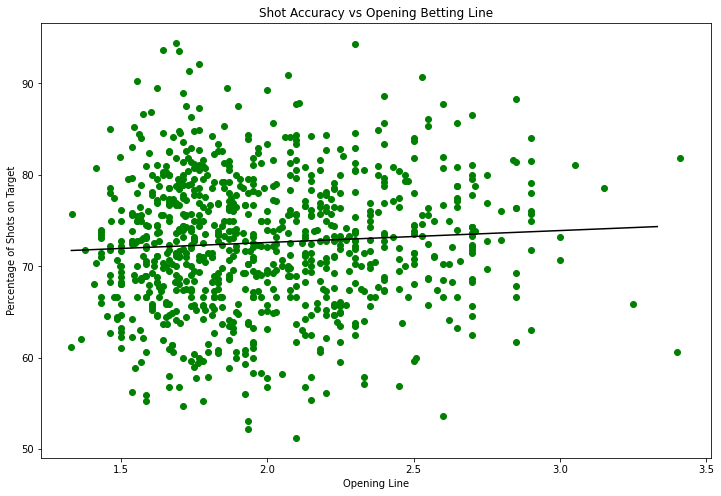

In [581]:
plt.figure(figsize=(12,8))
plt.scatter(on_target_data.groupby(['game_id', 'teamCode']).mean()['Open'], on_target_data.groupby(['game_id', 'teamCode']).mean()['on_target_percentage'], color='green')
x = np.arange(start=on_target_data.groupby(['game_id', 'teamCode']).mean()['Open'].min(), stop=on_target_data.groupby(['game_id', 'teamCode']).mean()['Open'].max())
plt.plot(x, 1.3063655668970853*x + 69.98488680148274, color = 'black')
plt.title('Shot Accuracy vs Opening Betting Line')
plt.xlabel('Opening Line')
plt.ylabel('Percentage of Shots on Target')

### Accuracy Distribution Analysis

In [582]:
on_target_favorites.groupby('game_id').mean()['on_target_percentage'].describe()

count    435.000000
mean      72.535582
std        7.333760
min       54.716981
25%       67.391304
50%       72.727273
75%       77.500000
max       94.444444
Name: on_target_percentage, dtype: float64

In [583]:
on_target_underdogs.groupby('game_id').mean()['on_target_percentage'].describe()

count    435.000000
mean      72.603484
std        7.232939
min       51.219512
25%       67.769273
50%       72.727273
75%       77.459677
max       94.285714
Name: on_target_percentage, dtype: float64

In [584]:
stats.ttest_ind(on_target_favorites.groupby('game_id').mean()['on_target_percentage'], on_target_underdogs.groupby('game_id').mean()['on_target_percentage'], equal_var=False)

Ttest_indResult(statistic=-0.1374901355684402, pvalue=0.8906752812347793)

We see that these distributions are nearly identical. There appears to be no correlation between shot accuracy and betting favorites.

## Boxplots of Shot Accuracy

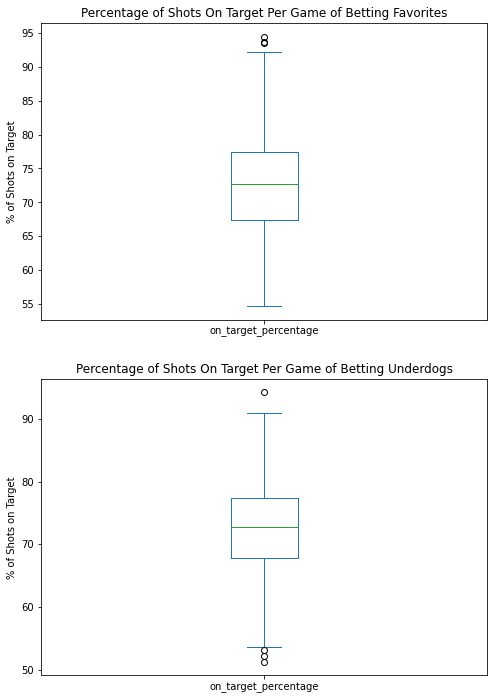

In [585]:
f, ((ax1, ax3)) = plt.subplots(2, figsize=(8,12))
on_target_favorites['on_target_percentage'].groupby('game_id').mean().plot(ax=ax1, kind='box', title='Percentage of Shots On Target Per Game of Betting Favorites', ylabel='% of Shots on Target')
on_target_underdogs['on_target_percentage'].groupby('game_id').mean().plot(ax=ax3, kind='box', title='Percentage of Shots On Target Per Game of Betting Underdogs', ylabel='% of Shots on Target')

# Data Analysis and Visualization III

In this section, I explore how betting odds correlate with shot types, expected goals, and total goal numbers. In order to do this, I use opening lines to designate favorites, as well as shifts between opening and closing lines to indicate late favorites or underdogs that indicate shifting public sense of possible outcome before the game. This also is often caused from large sums of money being placed on certain lines that deemed incorrect and exploitable. I expect to find higher goal and expected goal numbers from favorites and late favorites.

### Splitting Dataset

In [586]:
underdogs = correct_games[correct_games['Open'] > 1.909095] # 1.9090 repeating is the decimal value of a pickem game
favorites = correct_games[correct_games['Open'] < 1.909087]
pickem = correct_games[(correct_games['Open'] > 1.909087) & (correct_games['Open'] < 1.909095)]

## Pie Chart of Shot Types

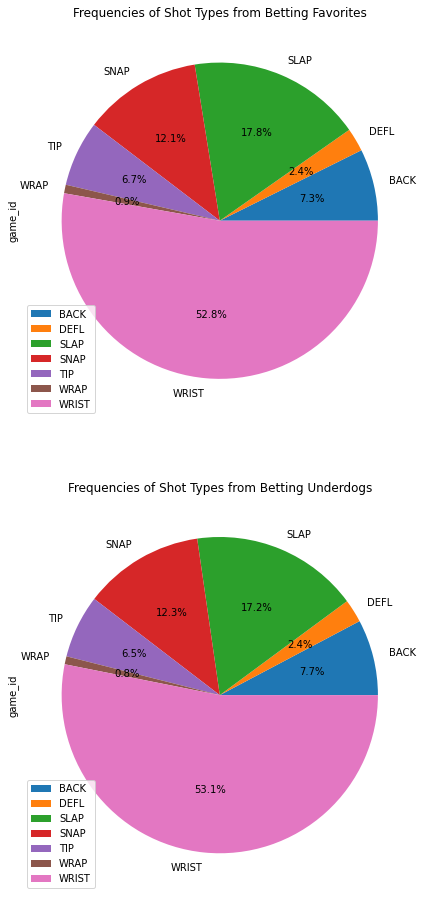

In [587]:
f, ((ax1, ax3)) = plt.subplots(2, figsize=(16,16))
favorites.groupby('shotType').count().plot(ax=ax1, kind='pie', autopct='%1.1f%%', y='game_id', title='Frequencies of Shot Types from Betting Favorites')
underdogs.groupby('shotType').count().plot(ax=ax3, kind='pie', autopct='%1.1f%%', y='game_id', title='Frequencies of Shot Types from Betting Underdogs')

### Expected and Total Goal Numbers

I add up the total amount of expected goals from each shot by a team in a given game to determine their expected goals generated from the shots they took in that game. I also use the final category to get their total actual goal number for a given game.

In [588]:
favorites_xgoals = favorites.groupby(['teamCode', 'game_id']).sum()['xGoal']
underdogs_xgoals = underdogs.groupby(['teamCode', 'game_id']).sum()['xGoal']
pickem_xgoals = pickem.groupby(['teamCode', 'game_id']).sum()['xGoal']
favorites_scores = favorites.groupby(['teamCode', 'game_id']).mean()['Final']
underdogs_scores = underdogs.groupby(['teamCode', 'game_id']).mean()['Final']
pickem_scores = pickem.groupby(['teamCode', 'game_id']).mean()['Final']

### Expected Goals Per Game Distributions

In [589]:
favorites_xgoals.describe()

count    435.000000
mean       3.074594
std        0.964776
min        1.070735
25%        2.360859
50%        2.970367
75%        3.613970
max        6.979052
Name: xGoal, dtype: float64

In [590]:
underdogs_xgoals.describe()

count    435.000000
mean       2.770295
std        0.899676
min        0.895563
25%        2.145922
50%        2.650065
75%        3.289087
max        5.712778
Name: xGoal, dtype: float64

In [591]:
pickem_xgoals.describe()

count    2.000000
mean     3.646502
std      0.123861
min      3.558919
25%      3.602710
50%      3.646502
75%      3.690293
max      3.734085
Name: xGoal, dtype: float64

### Goals Per Game Distributions

In [592]:
favorites_scores.describe()

count    435.000000
mean       3.326437
std        1.751659
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: Final, dtype: float64

In [593]:
underdogs_scores.describe()

count    435.000000
mean       2.811494
std        1.709652
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: Final, dtype: float64

In [594]:
pickem_scores.describe()

count    2.000000
mean     4.500000
std      3.535534
min      2.000000
25%      3.250000
50%      4.500000
75%      5.750000
max      7.000000
Name: Final, dtype: float64

### t-test on expected and total goals per game distributions of favorites and underdogs

In [595]:
stats.ttest_ind(favorites_xgoals, underdogs_xgoals, equal_var=False)

Ttest_indResult(statistic=4.811109567192543, pvalue=1.770835825450585e-06)

In [596]:
stats.ttest_ind(favorites_scores, underdogs_scores, equal_var=False)

Ttest_indResult(statistic=4.387790035502472, pvalue=1.285974628674525e-05)

Given the high test statistics and extremely low p-values, we can see there is a statistically significant difference between the expected and total goal distributions of favorites and underdogs. This is consistent with what we expected, with favorites generating a greater number of quality scoring chances, allowing them to score more goals because of this.

## Expected and Total Goals Per Game Boxplots

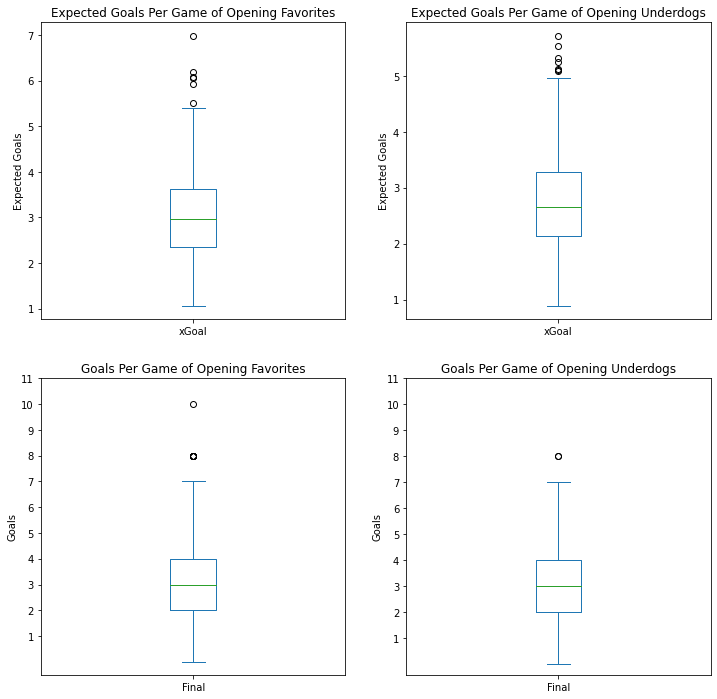

In [597]:
f, ((ax1, ax3),(ax2,ax4)) = plt.subplots(2,2, figsize=(12,12))
favorites_xgoals.plot(ax=ax1, kind='box', title='Expected Goals Per Game of Opening Favorites', ylabel='Expected Goals')
underdogs_xgoals.plot(ax = ax3,kind='box', title='Expected Goals Per Game of Opening Underdogs', ylabel='Expected Goals')
favorites_scores.plot(ax=ax2, kind='box', title='Goals Per Game of Opening Favorites', ylabel='Goals', yticks=[1,2,3,4,5,6,7,8,9,10,11])
underdogs_scores.plot(ax=ax4, kind='box', title='Goals Per Game of Opening Underdogs', ylabel='Goals', yticks=[1,2,3,4,5,6,7,8,9,10,11])
plt.show()

### Finding Late Betting Line Flips

These games are when one team opened as the betting favorite and the other as the underdog, but they flipped by the time the game started. This often idicates that the money wagered was very lopsided on the underdog at first.

In [598]:
late_favorites = correct_games[(correct_games['Close'] < 1.909087) & (correct_games['Open'] > 1.909087)]
late_underdogs = correct_games[(correct_games['Close'] > 1.909095) & (correct_games['Open'] < 1.909095)]
late_favorites

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,Team_code,teams_match
1,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
3,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
5,1054131,WPG,TOR,2017,0,20001,0,13,63,6,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
7,1054132,WPG,TOR,2017,0,20001,0,17,75,31,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
15,1054136,WPG,TOR,2017,0,20001,0,26,222,8,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186409,1147333,TOR,PIT,2017,0,21055,1,278,3074,7,...,1.934579,1.892857,1.5,1.333333,6.5,1.869565,6.5,1.869565,TOR,True
186413,1147335,TOR,PIT,2017,0,21055,1,280,3099,0,...,1.934579,1.892857,1.5,1.333333,6.5,1.869565,6.5,1.869565,TOR,True
186417,1147337,TOR,PIT,2017,0,21055,1,291,3215,0,...,1.934579,1.892857,1.5,1.333333,6.5,1.869565,6.5,1.869565,TOR,True
186421,1147339,TOR,PIT,2017,0,21055,1,298,3255,0,...,1.934579,1.892857,1.5,1.333333,6.5,1.869565,6.5,1.869565,TOR,True


In [599]:
late_underdogs

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,Team_code,teams_match
8,1054133,WPG,TOR,2017,0,20001,0,18,106,8,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
10,1054134,WPG,TOR,2017,0,20001,0,20,127,11,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
12,1054135,WPG,TOR,2017,0,20001,0,21,138,18,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
26,1054142,WPG,TOR,2017,0,20001,0,33,311,1,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
32,1054145,WPG,TOR,2017,0,20001,0,49,432,19,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186430,1147344,TOR,PIT,2017,0,21055,1,320,3438,6,...,1.884956,1.925926,-1.5,3.400000,6.5,1.952381,6.5,1.952381,PIT,True
186432,1147345,TOR,PIT,2017,0,21055,1,322,3452,0,...,1.884956,1.925926,-1.5,3.400000,6.5,1.952381,6.5,1.952381,PIT,True
186434,1147346,TOR,PIT,2017,0,21055,1,325,3486,1,...,1.884956,1.925926,-1.5,3.400000,6.5,1.952381,6.5,1.952381,PIT,True
186436,1147347,TOR,PIT,2017,0,21055,1,328,3505,10,...,1.884956,1.925926,-1.5,3.400000,6.5,1.952381,6.5,1.952381,PIT,True


### Finding Expected and Total Goals Numbers For These Games

In [600]:
late_favorites_xgoals = late_favorites.groupby(['teamCode', 'game_id']).sum()['xGoal']
late_underdogs_xgoals = late_underdogs.groupby(['teamCode', 'game_id']).sum()['xGoal']
late_favorites_scores = late_favorites.groupby(['teamCode', 'game_id']).mean()['Final']
late_underdogs_scores = late_underdogs.groupby(['teamCode', 'game_id']).mean()['Final']

### Expected Goals Per Game Distributions

In [601]:
late_favorites_xgoals.describe()

count    28.000000
mean      2.703034
std       0.964625
min       0.964705
25%       1.936916
50%       2.665849
75%       3.438853
max       4.698698
Name: xGoal, dtype: float64

In [602]:
late_underdogs_xgoals.describe()

count    28.000000
mean      2.855969
std       0.795992
min       1.668546
25%       2.264885
50%       2.796062
75%       3.308758
max       4.955454
Name: xGoal, dtype: float64

### Goals Per Game Distributions

In [603]:
late_favorites_scores.describe()

count    28.000000
mean      2.321429
std       1.826828
min       0.000000
25%       1.000000
50%       2.000000
75%       3.250000
max       6.000000
Name: Final, dtype: float64

In [604]:
late_underdogs_scores.describe()

count    28.000000
mean      3.750000
std       1.713238
min       1.000000
25%       2.000000
50%       3.500000
75%       5.000000
max       7.000000
Name: Final, dtype: float64

### t-tests

In [605]:
stats.ttest_ind(late_favorites_xgoals, late_underdogs_xgoals, equal_var=False)

Ttest_indResult(statistic=-0.6470726696450003, pvalue=0.5204246036064218)

In [606]:
stats.ttest_ind(late_favorites_scores, late_underdogs_scores, equal_var=False)

Ttest_indResult(statistic=-3.0182909294771685, pvalue=0.003880316532247049)

There appears to be no significantly significant difference between the expected goal values of the two groups with a low test statistic and p-value of 0.52. However, there does appear to be a statistically significant difference between late underdogs scoring more goals than late favorites with a test statistic of -3.01 and a p-value of 0.003. While this is the opposite of what I expected to find, the similarity in expected goal distributions would suggest that these teams are generating a similar number of quality scoring chances, but during the small sample size of 28 games, the late underdogs capitalized more on their opportunities.

## Late Favorite and Underdog Bar Graphs

Text(0.5, 1.0, 'Total Expected Goals During Game as a Late Favorite')

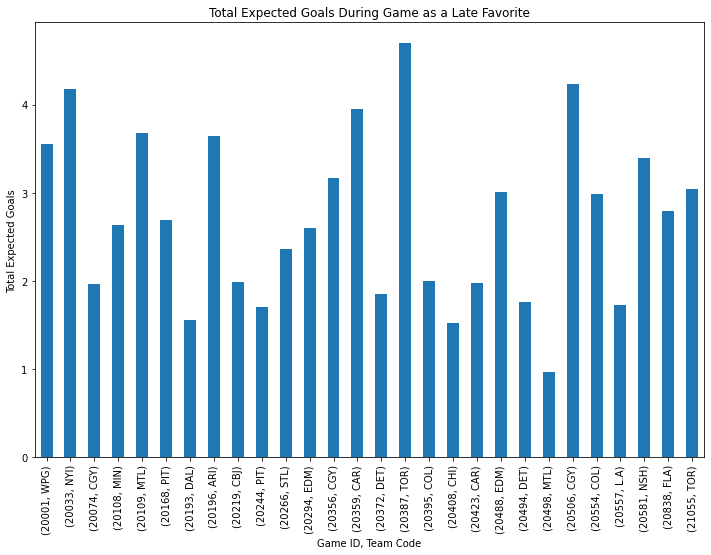

In [607]:
late_favorites.groupby(['game_id', 'teamCode']).sum()['xGoal'].plot(kind='bar', figsize=(12,8))
plt.xlabel('Game ID, Team Code')
plt.ylabel('Total Expected Goals')
plt.title('Total Expected Goals During Game as a Late Favorite')

Text(0.5, 1.0, 'Total Expected Goals During Game as a Late Underdog')

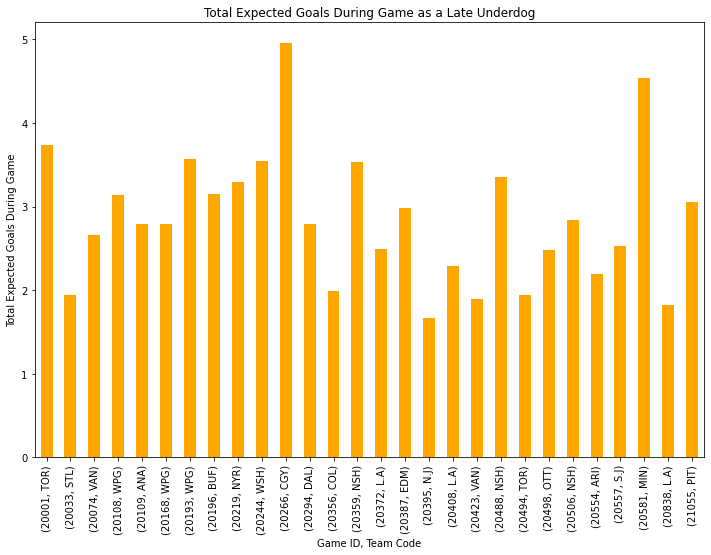

In [608]:
late_underdogs.groupby(['game_id', 'teamCode']).sum()['xGoal'].plot(kind='bar', color='orange', figsize=(12,8))
plt.xlabel('Game ID, Team Code')
plt.ylabel('Total Expected Goals During Game')
plt.title('Total Expected Goals During Game as a Late Underdog')

## Late Favorite and Underdog Boxplots


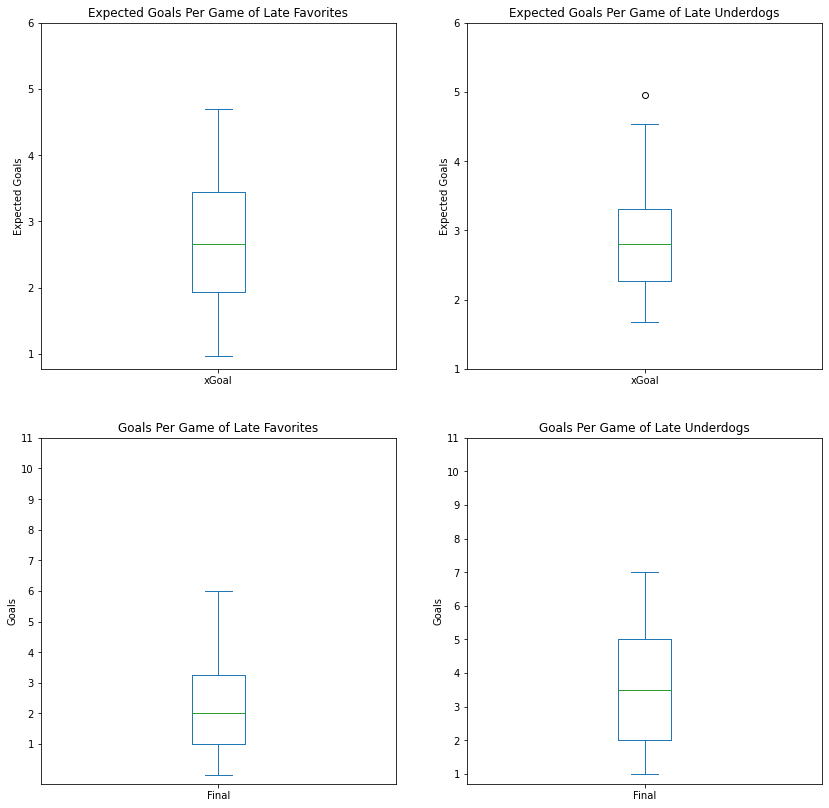

In [609]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,14))
late_favorites_xgoals.plot(ax=ax1, kind='box', title='Expected Goals Per Game of Late Favorites', ylabel='Expected Goals', yticks=[1,2,3,4,5,6])
late_underdogs_xgoals.plot(ax = ax2,kind='box', title='Expected Goals Per Game of Late Underdogs', ylabel='Expected Goals', yticks=[1,2,3,4,5,6])
late_favorites_scores.plot(ax=ax3, kind='box', title='Goals Per Game of Late Favorites', ylabel='Goals', yticks=[1,2,3,4,5,6,7,8,9,10,11])
late_underdogs_scores.plot(ax=ax4, kind='box', title='Goals Per Game of Late Underdogs', ylabel='Goals', yticks=[1,2,3,4,5,6,7,8,9,10,11])
plt.show()

# Data Analysis and Visualization IV

In this section, I only focus on shot data to explore the relationship between quality of scoring chances created and the length of shift for the defending team. I expect to find that on average, shots taken when the defending team is later into a shift and tired, the average expected goal per shot will be higher.

### Splitting Dataset

In [610]:
long_shift = correct_games[correct_games['defendingTeamMaxTimeOnIce'] > 60]
short_shift = correct_games[correct_games['defendingTeamMaxTimeOnIce'] < 60]

### Expected Goal Per Shot Distributions

In [611]:
long_shift['xGoal'].describe()

count    8780.000000
mean        0.075598
std         0.111469
min         0.001000
25%         0.016161
50%         0.039541
75%         0.087483
max         0.966000
Name: xGoal, dtype: float64

In [612]:
short_shift['xGoal'].describe()

count    29244.000000
mean         0.063464
std          0.090892
min          0.001000
25%          0.013563
50%          0.032730
75%          0.078024
max          0.975868
Name: xGoal, dtype: float64

### t-test

In [613]:
stats.ttest_ind(long_shift['xGoal'], short_shift['xGoal'], equal_var=False)

Ttest_indResult(statistic=9.312857257896692, pvalue=1.450662295820049e-20)

With a very large test statistic of 9.313 and a p-value of almost 0, there is a clear statistically significant difference between these two distributions, with the expected goal values of shots taken late in opponent shifts being  higher than those taken early in opponent shifts. This is consistent with what we expected. This demonstrates the value created with good possesion and forcing opponents to take long shifts. 

## Expected Goals Boxplots

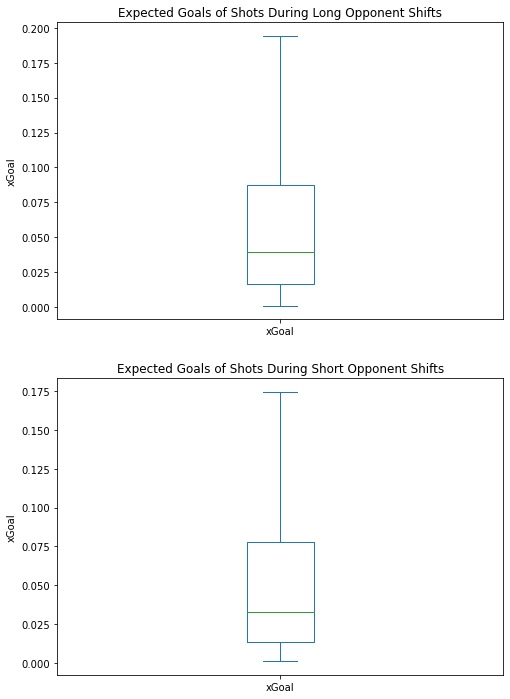

In [614]:
f, ((ax1, ax3)) = plt.subplots(2, figsize=(8,12))
long_shift['xGoal'].plot(ax=ax1, kind='box', showfliers=False, title='Expected Goals of Shots During Long Opponent Shifts', ylabel='xGoal')
short_shift['xGoal'].plot(ax=ax3, kind='box', showfliers=False, title='Expected Goals of Shots During Short Opponent Shifts', ylabel='xGoal')

### Linear Regression

In [615]:
stats.linregress(x=correct_games['defendingTeamMaxTimeOnIce'], y= correct_games['xGoal'])

LinregressResult(slope=0.00030929243132610566, intercept=0.05247362107056262, rvalue=0.08023191047838106, pvalue=6.238771371046346e-56, stderr=1.9598229625942482e-05)

With this low of an r-value, the relationship between shift length and expected goals does not appear to be linear. However, as shown in the boxplots above and the scatterplot below, there is a large abundance of outliers above xGoal=0.2 that may skew the data.

## Expected Goals Scatterplot

Text(0.5, 0, 'Longest Shift Length of a Player on Defense During Shot')

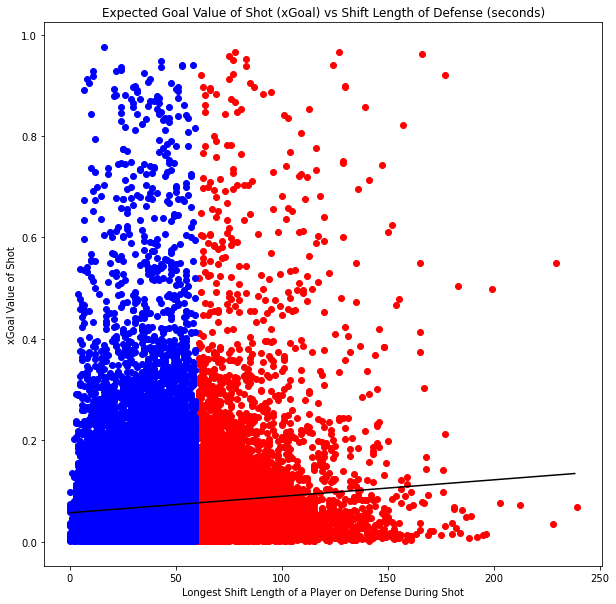

In [616]:
plt.figure(figsize=(10,10))
plt.scatter(long_shift['defendingTeamMaxTimeOnIce'], long_shift['xGoal'], color='red') # Shifts over one minute
plt.scatter(short_shift['defendingTeamMaxTimeOnIce'], short_shift['xGoal'], color='blue') # Shifts under one minute
x = np.arange(long_shift['defendingTeamMaxTimeOnIce'].max())
plt.plot(x, 0.00032548669474009303*x + 0.05681562329836666, color = 'black')
plt.title('Expected Goal Value of Shot (xGoal) vs Shift Length of Defense (seconds)')
plt.ylabel('xGoal Value of Shot')
plt.xlabel('Longest Shift Length of a Player on Defense During Shot')

# Data Manipulation and Visualization V

In the final data manipulation and visualization section, I will be exploring whether or not over under line shifts correlate with those lines cashing. For example, does a line moving from 5.5 to 6 goals correlate with more than 6 goals being scored. In order to do this, I create two dataframes under the condition that the line shifted positively or negatively from the opening line. Then, I will find the final scores of these games and subtract them from their updated lines to find the difference. A positive number will indicate the over cashing, and a negative number will indicate the under cashing.

In [617]:
pos_ou_shift = correct_games[correct_games['Close_OU'] > correct_games['Open_OU']]
neg_ou_shift = correct_games[correct_games['Close_OU'] < correct_games['Open_OU']]
pos_ou_shift

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,Open,Close,Puck_line,Puck_line_odds,Open_OU,Open_OU_odds,Close_OU,Close_OU_odds,Team_code,teams_match
1,1054129,WPG,TOR,2017,0,20001,0,7,38,3,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
3,1054130,WPG,TOR,2017,0,20001,0,9,49,1,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
5,1054131,WPG,TOR,2017,0,20001,0,13,63,6,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
7,1054132,WPG,TOR,2017,0,20001,0,17,75,31,...,1.909091,1.869565,-1.5,3.350000,5.5,2.050000,6.0,1.952381,WPG,True
8,1054133,WPG,TOR,2017,0,20001,0,18,106,8,...,1.909091,1.952381,1.5,1.338983,5.5,1.800000,6.0,1.869565,TOR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175606,1141932,COL,MIN,2017,0,20995,1,284,3470,9,...,1.884956,1.869565,-1.5,3.450000,5.5,1.833333,6.0,2.050000,MIN,True
175608,1141933,COL,MIN,2017,0,20995,1,285,3479,7,...,1.884956,1.869565,-1.5,3.450000,5.5,1.833333,6.0,2.050000,MIN,True
175610,1141934,COL,MIN,2017,0,20995,1,289,3499,29,...,1.884956,1.869565,-1.5,3.450000,5.5,1.833333,6.0,2.050000,MIN,True
175613,1141935,COL,MIN,2017,0,20995,1,290,3528,22,...,1.934579,1.952381,1.5,1.327869,5.5,2.000000,6.0,1.800000,COL,True


### Finding the final scores of each game

I add the max and min of the 'Final' in order to find the total goals scored because those will be the scores of the two teams in a given game. 

In [618]:
pos_final = pos_ou_shift.groupby('game_id').max()['Final'] + pos_ou_shift.groupby('game_id').min()['Final']
neg_final = neg_ou_shift.groupby('game_id').max()['Final'] + neg_ou_shift.groupby('game_id').min()['Final']
pos_final

game_id
20001     9
20031     2
20034     8
20037     7
20044     5
20051     9
20053     5
20075     6
20077     4
20100     3
20119     6
20179     8
20184     4
20222     5
20231     7
20249     6
20263     3
20301     4
20305     6
20306     7
20314     7
20338     4
20369     9
20373     5
20374     5
20506     2
20670     9
20862    12
20865     8
20903     9
20965     1
20989     7
20995     8
Name: Final, dtype: int64

### Difference in Scores Distributions

In [619]:
pos_difference = pos_final-pos_ou_shift.groupby('game_id').mean()['Close_OU']
neg_difference = neg_final-neg_ou_shift.groupby('game_id').mean()['Close_OU']
pos_difference.describe()

count    33.000000
mean      0.151515
std       2.451036
min      -5.000000
25%      -1.500000
50%       0.000000
75%       2.000000
max       6.000000
dtype: float64

In [620]:
neg_difference.describe()

count    27.000000
mean      1.018519
std       1.701139
min      -2.500000
25%      -0.500000
50%       1.000000
75%       2.250000
max       3.500000
dtype: float64

In both directions of the line switches, in this small sample size, the over cashes on average. Given the small sample sizes, I am hesitant to go farther than this observation, although it is interesting to note that when the line shifted negatively, there was an average of more than a goal scored greater than the line predicted.

## Over Under Boxplots

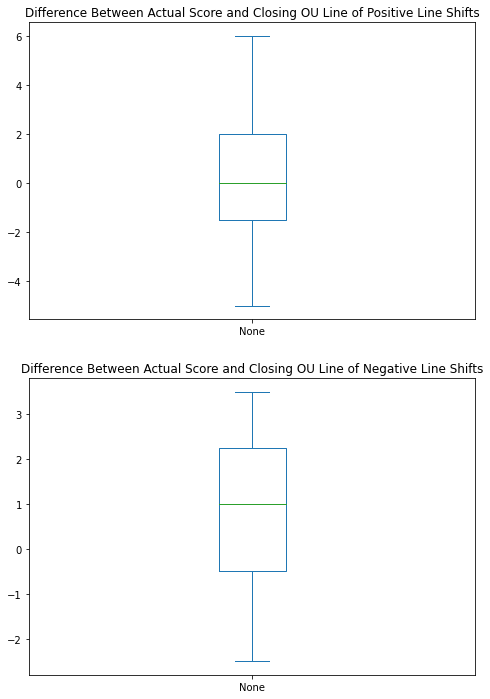

In [621]:
f, ((ax1, ax3)) = plt.subplots(2, figsize=(8,12))
pos_difference.plot(ax=ax1, kind='box', title='Difference Between Actual Score and Closing OU Line of Positive Line Shifts')
neg_difference.plot(ax=ax3, kind='box', title='Difference Between Actual Score and Closing OU Line of Negative Line Shifts')